In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sys.path.append("..")

from nlpChess.utils.DatasetLoader import loadDataset
from datasets import concatenate_datasets

In [2]:
dataset = concatenate_datasets(loadDataset().values())["Moves"]

As a preliminary analysis for this series on analysis how well the individual models are doing it is important to know where games usually end to have an intuition where data gets more and more sparse in the analysis. The histogram is shown below. 

Text(0.5, 1.0, 'Game Lengths (n_games=100000)')

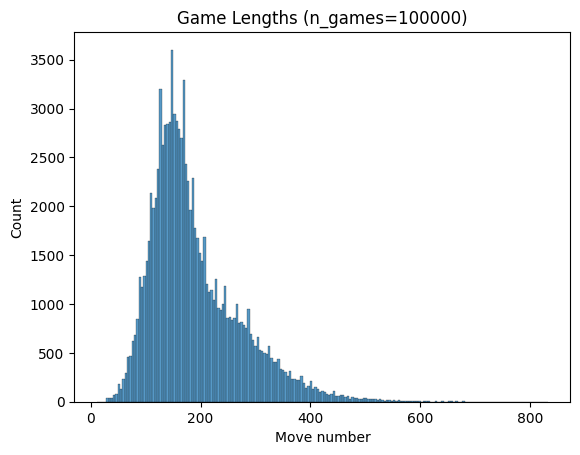

In [3]:
lengths = [len(x) for x in dataset]
sns.histplot(lengths)
plt.xlabel("Move number")
plt.title(f"Game Lengths (n_games={len(lengths)})")

## MOVED PIECES

Here we do load a single layer LSTM which predicts the moved piece. Pieces on the board are pawn (p), rook (r), knight (n), bishop (b), queen (q) and king (k). From our analysis we get an overall validation accuracy of over 90 percent. The heatmap shown below displays the the probability distribution per move in a game over the pieces to predict. The red dots is the ground truth 

In [29]:

label = "pieces"

dataset = loadDataset()["test"].to_pandas()

In [30]:
OUTCOME_MAP = {k: v for v, k in enumerate(["0-1", "1/2-1/2", "1-0"])}
PIECE_MAP = {k: v for v, k in enumerate("prnbkq")}
    
def piece_map(pieces: np.ndarray) -> np.ndarray:
    m = {k: v for v, k in enumerate("prnbqk")}
    res = np.zeros(len(pieces))
    for i, p in enumerate(pieces):
        res[i] = m[p]
    return res

dataset["pieces"] = dataset["pieces"].apply(piece_map)
dataset

,Moves,Termination,Result,pieces,captures,checks,next_moves,termination_seqs,result_seqs,__index_level_0__
0,"[e2e4, c7c5, g1f3, d7d6, d2d4, c5d4, d1d4, b8c...",CHECKMATE,1-0,"[0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 4.0, 2.0, 4.0, ...","[, , , , , p, p, , , , , , , , , , , , , , , ,...","[False, False, False, False, False, False, Fal...","[c7c5, g1f3, d7d6, d2d4, c5d4, d1d4, b8c6, d4e...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, ...",73746
1,"[g1f3, g8f6, g2g3, g7g6, f1g2, f8g7, e1g1, e8g...",INSUFFICIENT_MATERIAL,1/2-1/2,"[2.0, 2.0, 0.0, 0.0, 3.0, 3.0, 5.0, 5.0, 0.0, ...","[, , , , , , , , , , , p, p, q, q, , , , n, n,...","[False, False, False, False, False, False, Fal...","[g8f6, g2g3, g7g6, f1g2, f8g7, e1g1, e8g8, d2d...","[INSUFFICIENT_MATERIAL, INSUFFICIENT_MATERIAL,...","[1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, ...",44990
2,"[e2e4, c7c5, c2c3, e7e6, d2d4, d7d5, e4e5, b8c...",FIVEFOLD_REPETITION,1/2-1/2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, ...","[, , , , , , , , , , , , , , p, , , p, n, n, ,...","[False, False, False, False, False, False, Fal...","[c7c5, c2c3, e7e6, d2d4, d7d5, e4e5, b8c6, g1f...","[FIVEFOLD_REPETITION, FIVEFOLD_REPETITION, FIV...","[1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, ...",9425
3,"[e2e4, c7c5, g1f3, d7d6, d2d4, c5d4, f3d4, g8f...",CHECKMATE,1-0,"[0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, ...","[, , , , , p, p, , , , , , , , , , , , , , , ,...","[False, False, False, False, False, False, Fal...","[c7c5, g1f3, d7d6, d2d4, c5d4, f3d4, g8f6, b1c...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, ...",68711
4,"[e2e4, c7c5, f2f4, d7d6, g1f3, b8c6, c2c3, e7e...",CHECKMATE,0-1,"[0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, ...","[, , , , , , , , , p, p, , , , , , n, b, , , ,...","[False, False, False, False, False, False, Fal...","[c7c5, f2f4, d7d6, g1f3, b8c6, c2c3, e7e6, d2d...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, ...",26425
...,...,...,...,...,...,...,...,...,...,...
9996,"[c2c4, e7e6, b1c3, d7d5, d2d4, g8f6, g1f3, c7c...",INSUFFICIENT_MATERIAL,1/2-1/2,"[0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, ...","[, , , , , , , , p, p, p, p, , , , p, n, b, q,...","[False, False, False, False, False, False, Fal...","[e7e6, b1c3, d7d5, d2d4, g8f6, g1f3, c7c5, c4d...","[INSUFFICIENT_MATERIAL, INSUFFICIENT_MATERIAL,...","[1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, ...",6265
9997,"[e2e4, e7e6, d2d4, d7d5, e4e5, c7c5, c2c3, b8c...",CHECKMATE,0-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, ...","[, , , , , , , , , , , p, , , , , , , , , , , ...","[False, False, False, False, False, False, Fal...","[e7e6, d2d4, d7d5, e4e5, c7c5, c2c3, b8c6, g1f...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, ...",54886
9998,"[d2d4, d7d5, c2c4, c7c6, e2e3, g8f6, g1f3, e7e...",SEVENTYFIVE_MOVES,1/2-1/2,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 3.0, ...","[, , , , , , , , , , , , , , , , p, p, p, p, ,...","[False, False, False, False, False, False, Fal...","[d7d5, c2c4, c7c6, e2e3, g8f6, g1f3, e7e6, f1d...","[SEVENTYFIVE_MOVES, SEVENTYFIVE_MOVES, SEVENTY...","[1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, ...",76820
9999,"[e2e4, e7e5, f2f4, d7d5, e4d5, e5e4, d2d3, d8d...",CHECKMATE,1-0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 2.0, ...","[, , , , p, , , p, , , , n, b, , p, p, , p, p,...","[False, False, False, False, False, False, Fal...","[e7e5, f2f4, d7d5, e4d5, e5e4, d2d3, d8d5, b1c...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, ...",860


In [31]:
from gensim.models import Word2Vec
import torch
from torch.utils.data import Dataset

class OutcomeClassificationDataset(Dataset):
    def __init__(self, data, word2VecModel:Word2Vec, label, feature = "Moves"):
        self.data = data
        self.word2VecModel:Word2Vec = word2VecModel
        self.label = label
        self.feature = feature

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sent = self.data[idx][self.feature]
        # words = [self.word2VecModel.wv[token] if token in self.word2VecModel.wv.key_to_index else np.zeros(EMBEDDING_SIZE) for token in sent]
        words = [self.word2VecModel.wv[token] if token in self.word2VecModel.wv.key_to_index else np.zeros(100) for token in sent]
        label = self.data[idx][self.label]
        return torch.from_numpy(np.stack(words)).float(), torch.from_numpy(label).float()
    


In [32]:
from nlpChess.models import PretrainedModels
model = PretrainedModels.PIECES.loadModel()
embedding = Word2Vec.load("../model_weights/word2vec.model")
dataset_test_classify = OutcomeClassificationDataset(dataset.to_dict(orient='records'), embedding, label)

Text(0.5, 1.0, 'Prediction of moved pieces over game=0')

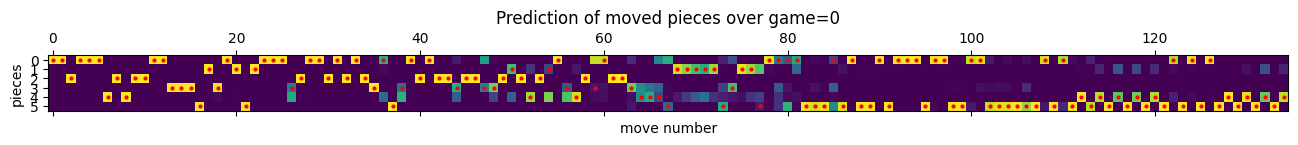

In [33]:
import torch
idx = 0
with torch.no_grad():
    x, y = dataset_test_classify[idx]
    out, hidden = model.forward(x)
plt.matshow(out.T)
plt.scatter(torch.arange(len(out)), y, c="r", s=4)
plt.ylabel("pieces")
plt.xlabel("move number")
plt.title(f"Prediction of moved pieces over game={idx}")

Now lets have a look where in a game the model is doing well and where not so much. We plot the cross entropy loss wrt. the ground truth piece distribution. We can see the model is doing clearly well in the early game but after leaving the predetermined and well known openings it seams to struggle to keep track of the board state and loses notion about which pieces are moved. Well will see this pattern once again in this analysis. 

Please also note that the high frequency error starting at 400 moves is likely a result of less data available this far in a game. (See game length distribution) 

In [36]:
ce = []
for x, y in dataset_test_classify:
    with torch.no_grad():
        out, _ = model.forward(x)
    index = np.arange(len(out))
    ce.append((np.stack([index, -torch.log(out[np.arange(len(out)), y.int()]).numpy()])))
ce_concat = np.concatenate(ce, axis=1)

Text(0.5, 1.0, 'Cross Entropy piece prediction')

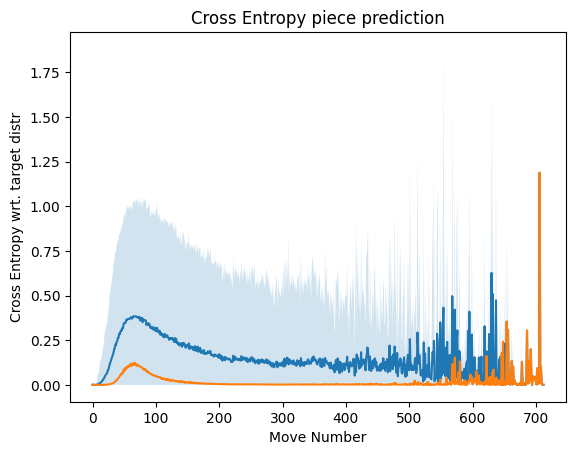

In [37]:
import pandas as pd 
df = pd.DataFrame(ce_concat.T, columns=["index", "ce"])

mean = df.groupby("index").mean()
median = df.groupby("index").median()
std = df.groupby("index").std()
lower = np.clip(mean - std, 0, np.inf)
plt.fill_between(mean.index.to_numpy(), (lower).values.squeeze(), (mean + std).values.squeeze(), alpha=0.2)
plt.plot(mean, label="mean")
plt.plot(median, label="median")
plt.xlabel("Move Number")
plt.ylabel("Cross Entropy wrt. target distr")
plt.title("Cross Entropy piece prediction")


Text(0.5, 1.0, 'Cross Entropy over Game progress')

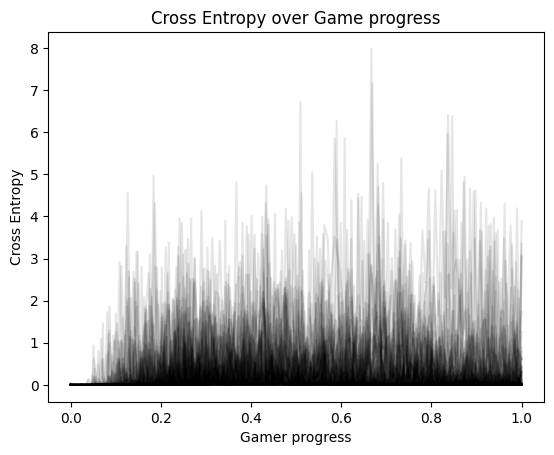

In [43]:
for ele in ce[:100]:
    plt.plot(np.linspace(0, 1, len(ele[1])), ele[1], c="k", alpha=0.1)
    
plt.ylabel("Cross Entropy")
plt.xlabel("Gamer progress")
plt.title("Cross Entropy over Game progress")

## Game outcome prediction

In the game outcome prediction we predict the game outcome for the whole game to achieve also a notion of how the game might end during a game and not only by the end of it. For this we use a LSTM and predict at every state of the sequence. 

As we can see the model is not so confident about the outcome until the very late game. The probabilities do not commit so much but when they do commit for us the late game has already begun and a single mistake has a higher impact to the whole game. 

In [44]:
label = "Result"
model = PretrainedModels.OUTCOMES.loadModel()

In [45]:
def repeat_label(d):
    moves, result = d
    result = [OUTCOME_MAP[result]] * len(moves)
    return np.array(result)
    
dataset["Result"] = dataset[['Moves', "Result"]].apply(repeat_label, axis=1)
dataset_test_classify = OutcomeClassificationDataset(dataset.to_dict(orient='records'), embedding, label)
dataset

,Moves,Termination,Result,pieces,captures,checks,next_moves,termination_seqs,result_seqs,__index_level_0__
0,"[e2e4, c7c5, g1f3, d7d6, d2d4, c5d4, d1d4, b8c...",CHECKMATE,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 4.0, 2.0, 4.0, ...","[, , , , , p, p, , , , , , , , , , , , , , , ,...","[False, False, False, False, False, False, Fal...","[c7c5, g1f3, d7d6, d2d4, c5d4, d1d4, b8c6, d4e...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, ...",73746
1,"[g1f3, g8f6, g2g3, g7g6, f1g2, f8g7, e1g1, e8g...",INSUFFICIENT_MATERIAL,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.0, 2.0, 0.0, 0.0, 3.0, 3.0, 5.0, 5.0, 0.0, ...","[, , , , , , , , , , , p, p, q, q, , , , n, n,...","[False, False, False, False, False, False, Fal...","[g8f6, g2g3, g7g6, f1g2, f8g7, e1g1, e8g8, d2d...","[INSUFFICIENT_MATERIAL, INSUFFICIENT_MATERIAL,...","[1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, ...",44990
2,"[e2e4, c7c5, c2c3, e7e6, d2d4, d7d5, e4e5, b8c...",FIVEFOLD_REPETITION,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, ...","[, , , , , , , , , , , , , , p, , , p, n, n, ,...","[False, False, False, False, False, False, Fal...","[c7c5, c2c3, e7e6, d2d4, d7d5, e4e5, b8c6, g1f...","[FIVEFOLD_REPETITION, FIVEFOLD_REPETITION, FIV...","[1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, ...",9425
3,"[e2e4, c7c5, g1f3, d7d6, d2d4, c5d4, f3d4, g8f...",CHECKMATE,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, ...","[, , , , , p, p, , , , , , , , , , , , , , , ,...","[False, False, False, False, False, False, Fal...","[c7c5, g1f3, d7d6, d2d4, c5d4, f3d4, g8f6, b1c...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, ...",68711
4,"[e2e4, c7c5, f2f4, d7d6, g1f3, b8c6, c2c3, e7e...",CHECKMATE,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, ...","[, , , , , , , , , p, p, , , , , , n, b, , , ,...","[False, False, False, False, False, False, Fal...","[c7c5, f2f4, d7d6, g1f3, b8c6, c2c3, e7e6, d2d...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, ...",26425
...,...,...,...,...,...,...,...,...,...,...
9996,"[c2c4, e7e6, b1c3, d7d5, d2d4, g8f6, g1f3, c7c...",INSUFFICIENT_MATERIAL,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, ...","[, , , , , , , , p, p, p, p, , , , p, n, b, q,...","[False, False, False, False, False, False, Fal...","[e7e6, b1c3, d7d5, d2d4, g8f6, g1f3, c7c5, c4d...","[INSUFFICIENT_MATERIAL, INSUFFICIENT_MATERIAL,...","[1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, ...",6265
9997,"[e2e4, e7e6, d2d4, d7d5, e4e5, c7c5, c2c3, b8c...",CHECKMATE,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, ...","[, , , , , , , , , , , p, , , , , , , , , , , ...","[False, False, False, False, False, False, Fal...","[e7e6, d2d4, d7d5, e4e5, c7c5, c2c3, b8c6, g1f...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, ...",54886
9998,"[d2d4, d7d5, c2c4, c7c6, e2e3, g8f6, g1f3, e7e...",SEVENTYFIVE_MOVES,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 3.0, ...","[, , , , , , , , , , , , , , , , p, p, p, p, ,...","[False, False, False, False, False, False, Fal...","[d7d5, c2c4, c7c6, e2e3, g8f6, g1f3, e7e6, f1d...","[SEVENTYFIVE_MOVES, SEVENTYFIVE_MOVES, SEVENTY...","[1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, ...",76820
9999,"[e2e4, e7e5, f2f4, d7d5, e4d5, e5e4, d2d3, d8d...",CHECKMATE,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 2.0, ...","[, , , , p, , , p, , , , n, b, , p, p, , p, p,...","[False, False, False, False, False, False, Fal...","[e7e5, f2f4, d7d5, e4d5, e5e4, d2d3, d8d5, b1c...","

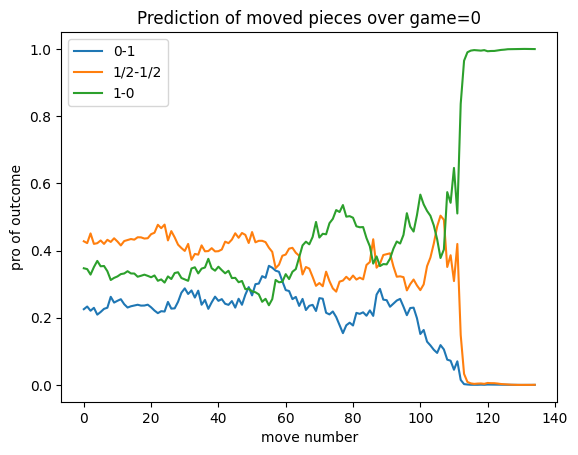

In [46]:
import torch
idx = 0
with torch.no_grad():
    x, y = dataset_test_classify[idx]
    out, hidden = model.forward(x)
plt.plot(out)
plt.ylabel("pro of outcome")
plt.xlabel("move number")
plt.title(f"Prediction of moved pieces over game={idx}")
plt.legend(["0-1", "1/2-1/2", "1-0"])

In [47]:
ce = []
for x, y in dataset_test_classify:
    with torch.no_grad():
        out, _ = model.forward(x)
    index = np.arange(len(out))
    ce.append((np.stack([index, -torch.log(out[np.arange(len(out)), y.int()]).numpy()])))
ce_concat = np.concatenate(ce, axis=1)

We can see from the distribution of lines we can see the predictions usually start and one tri-modal distribution and slowly diffuse but in the end most of the time converge to the ground truth outcome (Cross Entropy = 0). 

Text(0.5, 1.0, 'Cross Entropy over Game progress')

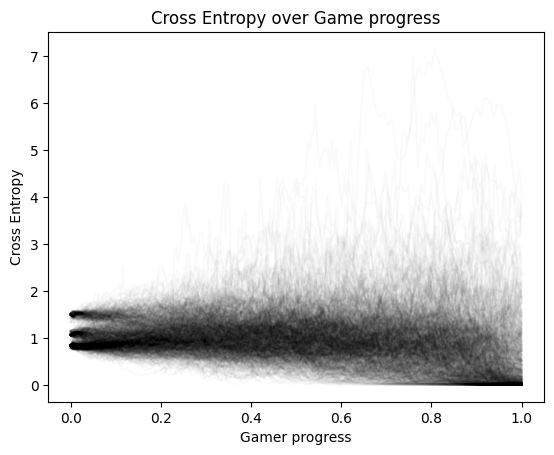

In [48]:
for ele in ce[:1000]:
    plt.plot(np.linspace(0, 1, len(ele[1])), ele[1], c="k", alpha=0.02)
    
plt.ylabel("Cross Entropy")
plt.xlabel("Gamer progress")
plt.title("Cross Entropy over Game progress")

## Next Token Prediction


For the next token prediction we took into account the very rigid rules of chess and therefor started slow with a small LSTM (one layer and hidden = 128). Across the whole next token prediction space (1959 tokens) we achieved an accuracy of 0.17 after only 10 epochs. Increasing the model capacity (more layer, higher hidden dimension, transformer, ...) seamed to hurt the performance not only for the next token prediction but also for all other tasks. For more details please refer to the weight and biases project: https://wandb.ai/robinu/NLP-chess

Back to the next token prediction we also want to know where the network is performing well and where it don't therefore we compute also the cross entropy over the move number and game progress.

In [53]:
label = "next_move"
model = PretrainedModels.NEXT_TOKEN.loadModel()

In [54]:
import yaml

with open("../move_map.yaml") as file:
    TOKEN_MAP = yaml.safe_load(file)

def remove_first_move(moves: np.ndarray) -> np.ndarray:
    moves = moves[1:]
    res = np.zeros(len(moves))
    for idx, m in enumerate(moves):
        res[idx] = TOKEN_MAP[m]
    return res

def remove_last_move(moves: np.ndarray) -> np.ndarray:
    return moves[:-1]

dataset["next_move"] = dataset['Moves'].apply(remove_first_move)
dataset["prev_move"] = dataset["Moves"].apply(remove_last_move)
dataset_test_classify = OutcomeClassificationDataset(dataset.to_dict(orient='records'), embedding, label, feature="prev_move")
dataset

,Moves,Termination,Result,pieces,captures,checks,next_moves,termination_seqs,result_seqs,__index_level_0__,next_move,prev_move
0,"[e2e4, c7c5, g1f3, d7d6, d2d4, c5d4, d1d4, b8c...",CHECKMATE,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 4.0, 2.0, 4.0, ...","[, , , , , p, p, , , , , , , , , , , , , , , ,...","[False, False, False, False, False, False, Fal...","[c7c5, g1f3, d7d6, d2d4, c5d4, d1d4, b8c6, d4e...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, ...",73746,"[664.0, 1522.0, 934.0, 758.0, 600.0, 724.0, 43...","[e2e4, c7c5, g1f3, d7d6, d2d4, c5d4, d1d4, b8c..."
1,"[g1f3, g8f6, g2g3, g7g6, f1g2, f8g7, e1g1, e8g...",INSUFFICIENT_MATERIAL,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.0, 2.0, 0.0, 0.0, 3.0, 3.0, 5.0, 5.0, 0.0, ...","[, , , , , , , , , , , p, p, q, q, , , , n, n,...","[False, False, False, False, False, False, Fal...","[g8f6, g2g3, g7g6, f1g2, f8g7, e1g1, e8g8, d2d...","[INSUFFICIENT_MATERIAL, INSUFFICIENT_MATERIAL,...","[1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, ...",44990,"[1736.0, 1558.0, 1712.0, 1268.0, 1504.0, 1001....","[g1f3, g8f6, g2g3, g7g6, f1g2, f8g7, e1g1, e8g..."
2,"[e2e4, c7c5, c2c3, e7e6, d2d4, d7d5, e4e5, b8c...",FIVEFOLD_REPETITION,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, ...","[, , , , , , , , , , , , , , p, , , p, n, n, ,...","[False, False, False, False, False, False, Fal...","[c7c5, c2c3, e7e6, d2d4, d7d5, e4e5, b8c6, g1f...","[FIVEFOLD_REPETITION, FIVEFOLD_REPETITION, FIV...","[1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, ...",9425,"[664.0, 492.0, 1203.0, 758.0, 933.0, 1097.0, 4...","[e2e4, c7c5, c2c3, e7e6, d2d4, d7d5, e4e5, b8c..."
3,"[e2e4, c7c5, g1f3, d7d6, d2d4, c5d4, f3d4, g8f...",CHECKMATE,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, ...","[, , , , , p, p, , , , , , , , , , , , , , , ,...","[False, False, False, False, False, False, Fal...","[c7c5, g1f3, d7d6, d2d4, c5d4, f3d4, g8f6, b1c...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, 1-0, ...",68711,"[664.0, 1522.0, 934.0, 758.0, 600.0, 1322.0, 1...","[e2e4, c7c5, g1f3, d7d6, d2d4, c5d4, f3d4, g8f..."
4,"[e2e4, c7c5, f2f4, d7d6, g1f3, b8c6, c2c3, e7e...",CHECKMATE,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, ...","[, , , , , , , , , p, p, , , , , , n, b, , , ,...","[False, False, False, False, False, False, Fal...","[c7c5, f2f4, d7d6, g1f3, b8c6, c2c3, e7e6, d2d...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, ...",26425,"[664.0, 1297.0, 934.0, 1522.0, 436.0, 492.0, 1...","[e2e4, c7c5, f2f4, d7d6, g1f3, b8c6, c2c3, e7e..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,"[c2c4, e7e6, b1c3, d7d5, d2d4, g8f6, g1f3, c7c...",INSUFFICIENT_MATERIAL,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, ...","[, , , , , , , , p, p, p, p, , , , p, n, b, q,...","[False, False, False, False, False, False, Fal...","[e7e6, b1c3, d7d5, d2d4, g8f6, g1f3, c7c5, c4d...","[INSUFFICIENT_MATERIAL, INSUFFICIENT_MATERIAL,...","[1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, 1/2-1/2, ...",6265,"[1203.0, 221.0, 933.0, 758.0, 1736.0, 1522.0, ...","[c2c4, e7e6, b1c3, d7d5, d2d4, g8f6, g1f3, c7c..."
9997,"[e2e4, e7e6, d2d4, d7d5, e4e5, c7c5, c2c3, b8c...",CHECKMATE,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, ...","[, , , , , , , , , , , p, , , , , , , , , , , ...","[False, False, False, False, False, False, Fal...","[e7e6, d2d4, d7d5, e4e5, c7c5, c2c3, b8c6, g1f...","[CHECKMATE, CHECKMATE, CHECKMATE, CHECKMATE, C...","[0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, 0-1, ...",54886,"[1203.0, 758.0, 933.0, 1097.0, 664.0, 492.0, 4...","[e2e4, e7e6, d2d4, d7d5, e4e5, c7c5, c2c3, b8c..."
9998,"[d2d4, d7d5

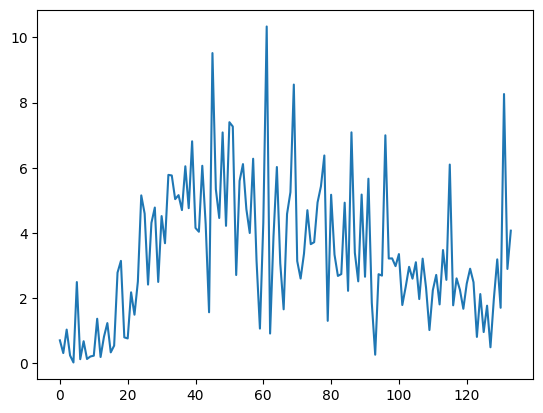

In [55]:
idx = 0
with torch.no_grad():
    x, y = dataset_test_classify[idx]
    out, _ = model.forward(x)

index = np.arange(len(out))
plt.plot(-torch.log(out[index, y.numpy()]))

In [56]:
ce = []
for x, y in dataset_test_classify:
    with torch.no_grad():
        out, _ = model.forward(x)
    index = np.arange(len(out))
    ce.append((np.stack([index, -torch.log(out[np.arange(len(out)), y.int()]).numpy()])))
ce_concat = np.concatenate(ce, axis=1)

Similar to the other tasks we are quite good in the early game (supposedly because of a finite set of openings) and worst in the mid game. What is interesting here is the gain in performance in the late game. We think this is due to the structure of chess where the number of possible moves later in a game decreases as we have less and less pieces on the board.

Text(0.5, 1.0, 'Cross Entropy over Game progress')

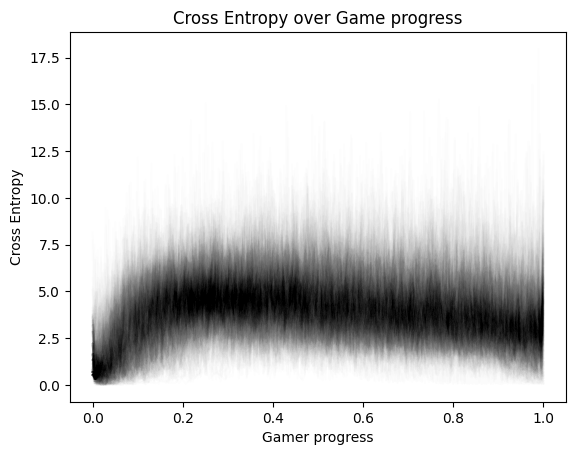

In [ ]:
for ele in ce[:500]:   
    plt.plot(np.linspace(0, 1, len(ele[1])), ele[1], c="k", alpha=0.008)
    
plt.ylabel("Cross Entropy")
plt.xlabel("Game progress")
plt.title("Cross Entropy over Game progress")

Text(0.5, 1.0, 'Cross Entropy piece prediction')

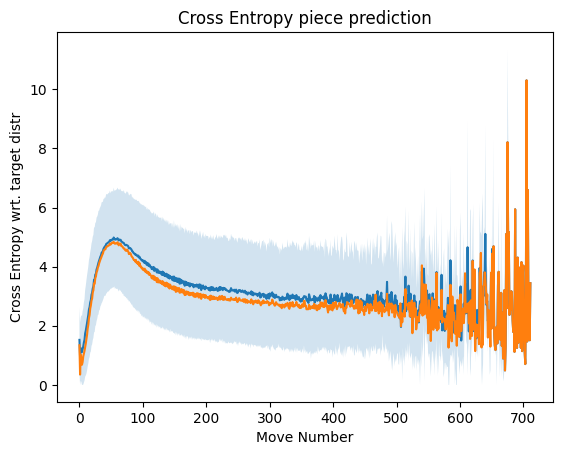

In [64]:
import pandas as pd 
df = pd.DataFrame(ce_concat.T, columns=["index", "ce"])

mean = df.groupby("index").mean()
median = df.groupby("index").median()
std = df.groupby("index").std()
lower = np.clip(mean - std, 0, np.inf)
plt.fill_between(mean.index.to_numpy(), (lower).values.squeeze(), (mean + std).values.squeeze(), alpha=0.2)
plt.plot(mean, label="mean")
plt.plot(median, label="median")
plt.xlabel("Move Number")
plt.ylabel("Cross Entropy wrt. target distr")
plt.title("Cross Entropy piece prediction")